In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load processed train/test splits
X_train = pd.read_csv("../Data/Processed/X_train.csv")
X_test  = pd.read_csv("../Data/Processed/X_test.csv")
y_train = pd.read_csv("../Data/Processed/y_train.csv").squeeze()
y_test  = pd.read_csv("../Data/Processed/y_test.csv").squeeze()

# Copy training data
X = X_train
y = y_train

# Numeric columns to scale
numeric_cols = [
    "Administrative", "Informational", "ProductRelated",
    "Administrative_Duration", "Informational_Duration",
    "ProductRelated_Duration", "BounceRates", "ExitRates", "SpecialDay"
]

# Scale training data
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train kNN with k=5 (baseline)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)


KNeighborsClassifier()

Confusion matrix:
 [[1982  102]
 [ 340   42]]
Accuracy: 0.821
Precision (class 1): 0.292
Recall (class 1): 0.110
F1-score (class 1): 0.160
ROC–AUC: 0.626


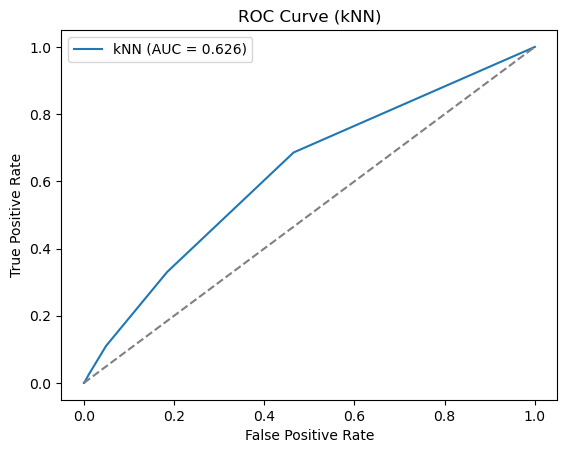

In [4]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt
import numpy as np

# Scale test data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Predict
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

# Confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Metrics for the positive class only (Revenue = 1)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = (y_pred == y_test).mean()
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision (class 1): {precision:.3f}")
print(f"Recall (class 1): {recall:.3f}")
print(f"F1-score (class 1): {f1:.3f}")
print(f"ROC–AUC: {auc:.3f}")

# ROC curve plot (optional for the report)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"kNN (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (kNN)")
plt.legend()
plt.show()
